# <center>Dunnhumby - The Complete Journey<center>

** ** 
    
# <center>*04 - Exploratory Data Analysis*<center>
    

In this notebook the artificially generated data will be joined to the real data


<br>
    
This project was developed by <br><br>

*<center>António Oliveira | NTT Data Summer Internship 2024<center>*

** **

<a class="anchor" id="0"></a>

# Table of Contents

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Data) <br><br>
    
2. [Initial Exploration](#2.-Initial-Exploration) <br><br>
    
3. [Missing Values](#3.-Missing-Values) <br><br>

4. [Outliers](#4.-Outliers) <br><br>

5. [Feature Engineering](#5.-Feature-Engineering) <br><br>

6. [Correlation Analysis](#6.-Correlation-Analysis) <br><br>

7. [Export](#7.-Export)

## 1. Importing Libraries & Data

### 1.1 Libraries

In [1]:
import pandas as pd
import json
import numpy as np


import functions

import plotly.express as px
import plotly.graph_objects as go

path = '/Users/antoniooliveira/Downloads/NTT project'
#path = "C:/Users/aprataso/Downloads/final_data"

In [2]:
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 1.2 Data

In [3]:
customer_info = pd.read_csv(f'{path}/Gold/final_customer_info.csv')

Deserialize the necessary columns

In [4]:
customer_info['quantity'] = customer_info['quantity'].apply(functions.deserialize_list)
customer_info['sales_value_eu'] = customer_info['sales_value_eu'].apply(functions.deserialize_list)
customer_info['department'] = customer_info['department'].apply(functions.deserialize_list)

## 2. Initial Exploration

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [5]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   household_key           2500 non-null   int64  
 1   quantity                2500 non-null   object 
 2   retail_disc             2500 non-null   float64
 3   coupon_disc             2500 non-null   float64
 4   coupon_match_disc       2500 non-null   float64
 5   sales_value_eu          2500 non-null   object 
 6   department              2500 non-null   object 
 7   first_transaction_date  2500 non-null   object 
 8   marital_status_code     2500 non-null   object 
 9   homeowner_desc          2500 non-null   object 
 10  marital_status          2500 non-null   object 
 11  age_group               2500 non-null   object 
 12  adult_category_size     2500 non-null   float64
 13  has_kids                2500 non-null   float64
 14  avg_age                 2500 non-null   

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.5f}'.format)

customer_info.describe().T

count        mean         std         min  \
household_key         2500.00000  1250.50000   721.83216     1.00000   
retail_disc           2500.00000    -0.55979     0.27798    -4.75216   
coupon_disc           2500.00000    -0.01384     0.02738    -0.42124   
coupon_match_disc     2500.00000    -0.00227     0.00635    -0.10078   
adult_category_size   2500.00000     1.44680     0.49726     1.00000   
has_kids              2500.00000     0.33800     0.47312     0.00000   
avg_age               2500.00000    39.91320    14.45160    21.50000   
avg_income            2500.00000 78072.00000 66852.82744 15000.00000   
n_kids                2500.00000     0.44280     0.70635     0.00000   
n_household           2500.00000     1.95360     1.04761     1.00000   
Groceries_spend       2500.00000  2033.18307  2063.02539     1.86000   
Delicacies_spend      2500.00000   111.68754   172.71494     0.00000   
Meat_spend            2500.00000   411.46429   456.97024     0.00000   
Bakery_spend          2500.00000    52.11509    71.59808     0.00000   
DRUG GM_spend         2500.00000   451.72107   600.31237     0.00000   
SALAD BAR_spend       2500.00000    13.24778    38.20087     0.00000   
MISC SALES TRAN_spend 2500.00000    51.34326   332.71487     0.00000   
RESTAURANT_spend      2500.00000     0.85051     6.84518     0.00000   
FLORAL_spend          2500.00000    16.97260    41.78259     0.00000   
Seafood_spend         2500.00000    39.63167    83.12628     0.00000   
COSMETICS_spend       2500.00000    13.85043    33.44710     0.00000   
KIOSK-GAS_spend       2500.00000   232.92818   532.53062     0.00000   
CHEF SHOPPE_spend     2500.00000     0.98093     3.75182     0.00000   
GARDEN CENTER_spend   2500.00000     3.28200    23.49975     0.00000   
MISC. TRANS._spend    2500.00000     4.57140    35.97450     0.00000   
SPIRITS_spend         2500.00000     9.27549    68.03945     0.00000   
AUTOMOTIVE_spend      2500.00000     0.19376     1.66482     0.00000   
TRAVEL & LEISUR_spend 2500.00000     1.09192     3.61832     0.00000   
CNTRL/STORE SUP_spend 2500.00000     0.02100     0.49514     0.00000   
COUP/STR & MFG_spend  2500.00000     0.44010     2.42471     0.00000   
GM MERCH EXP_spend    2500.00000     0.04327     0.51418     0.00000   
POSTAL CENTER_spend   2500.00000     0.01027     0.22164     0.00000   
DELI/SNACK BAR_spend  2500.00000     0.01544     0.32812     0.00000   
Photo/Video_spend     2500.00000     0.03259     0.49400     0.00000   
CHARITABLE CONT_spend 2500.00000     0.00331     0.14577     0.00000   
RX_spend              2500.00000     0.06829     1.05009     0.00000   
VIDEO RENTAL_spend    2500.00000     0.00919     0.27953     0.00000   
PROD-WHS SALES_spend  2500.00000     0.00322     0.11983     0.00000   
PHARMACY SUPPLY_spend 2500.00000     0.00724     0.19166     0.00000   
TOYS_spend            2500.00000     0.00421     0.14301     0.00000   
HBC_spend             2500.00000     0.00403     0.10176     0.00000   
ELECT &PLUMBING_spend 2500.00000     0.00043     0.02140     0.00000   
HOUSEWARES_spend      2500.00000     0.00128     0.06400     0.00000   
gender                2500.00000     1.13520     0.80373     0.00000   

                              25%         50%          75%          max  
household_key           625.75000  1250.50000   1875.25000   2500.00000  
retail_disc              -0.63738    -0.50439     -0.41269     -0.03625  
coupon_disc              -0.01489    -0.00479      0.00000      0.00000  
coupon_match_disc        -0.00165    -0.00018      0.00000      0.00000  
adult_category_size       1.00000     1.00000      2.00000      2.00000  
has_kids                  0.00000     0.00000      1.00000      1.00000  
avg_age                  29.50000    39.50000     49.50000     65.00000  
avg_income            29500.00000 62000.00000 112000.00000 250000.00000  
n_kids                    0.00000     0.00000      1.00000      3.00000  
n_household               1.00000     2.00000 

In [7]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_colwidth', None)

## 3. Missing Values

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [8]:
customer_info.isna().sum()

household_key             0
quantity                  0
retail_disc               0
coupon_disc               0
coupon_match_disc         0
sales_value_eu            0
department                0
first_transaction_date    0
marital_status_code       0
homeowner_desc            0
marital_status            0
age_group                 0
adult_category_size       0
has_kids                  0
avg_age                   0
avg_income                0
n_kids                    0
n_household               0
Groceries_spend           0
Delicacies_spend          0
Meat_spend                0
Bakery_spend              0
DRUG GM_spend             0
SALAD BAR_spend           0
MISC SALES TRAN_spend     0
RESTAURANT_spend          0
FLORAL_spend              0
Seafood_spend             0
COSMETICS_spend           0
KIOSK-GAS_spend           0
CHEF SHOPPE_spend         0
GARDEN CENTER_spend       0
MISC. TRANS._spend        0
SPIRITS_spend             0
AUTOMOTIVE_spend          0
TRAVEL & LEISUR_spen

## 4. Outliers

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

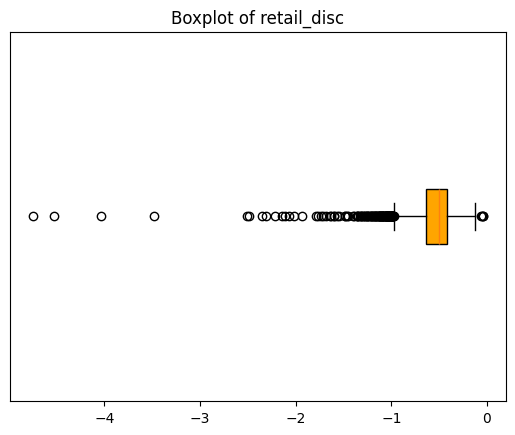

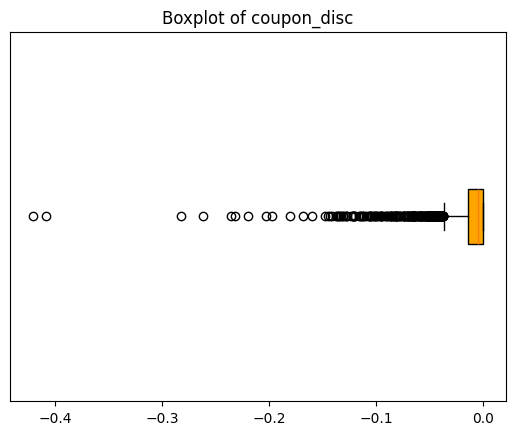

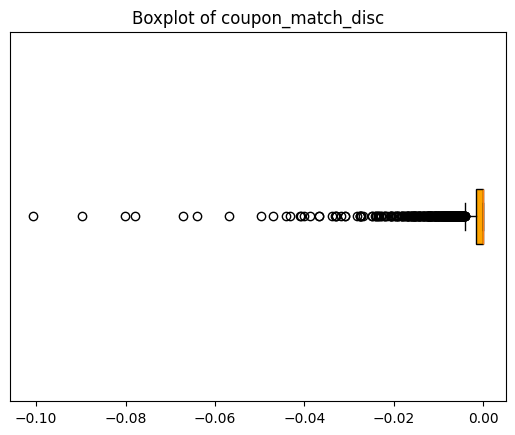

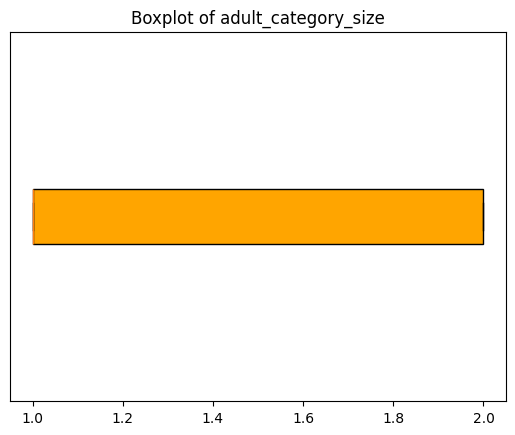

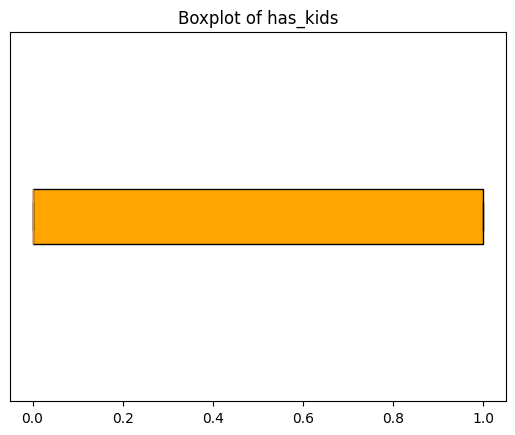

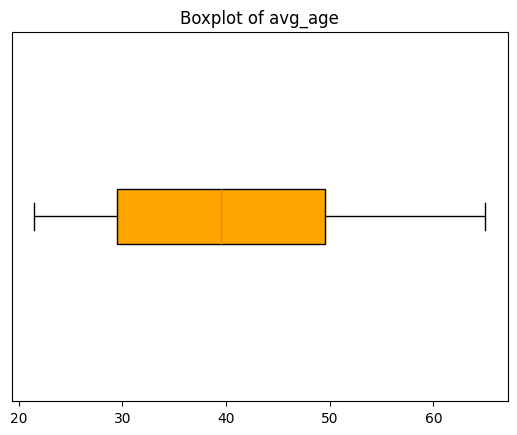

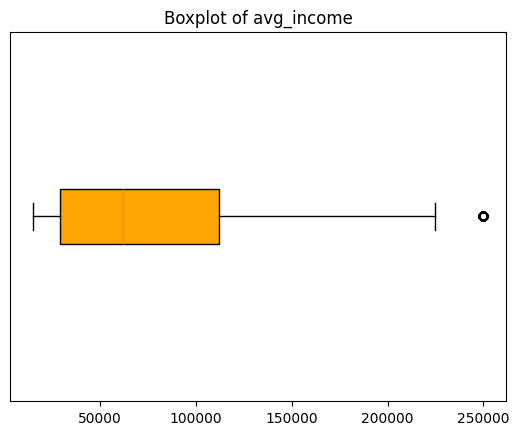

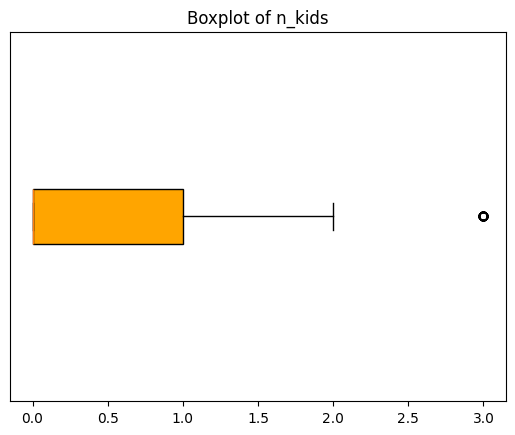

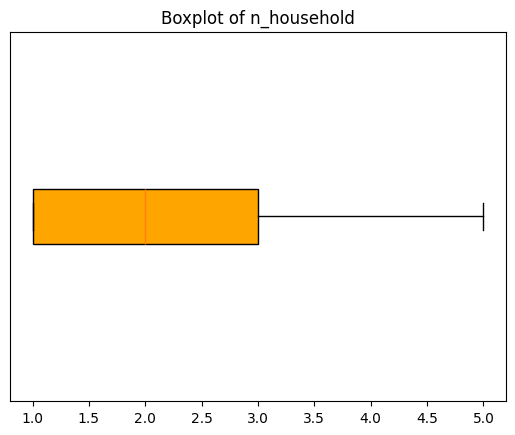

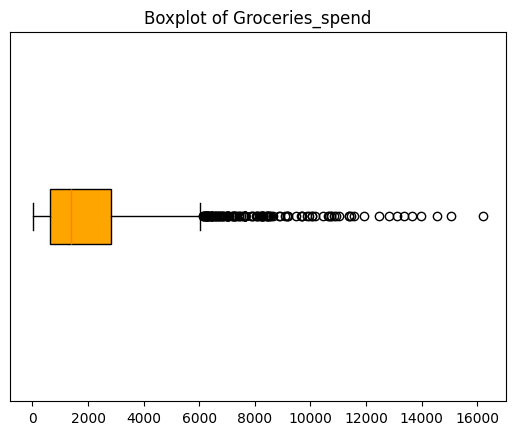

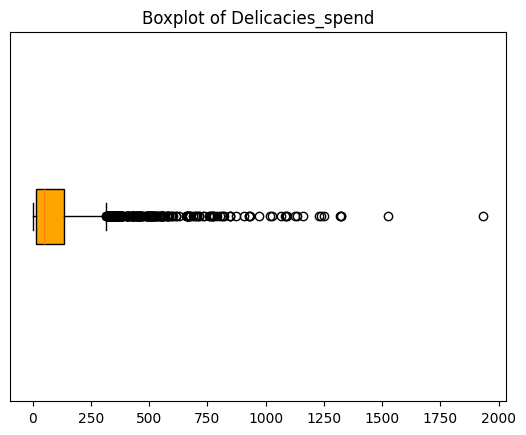

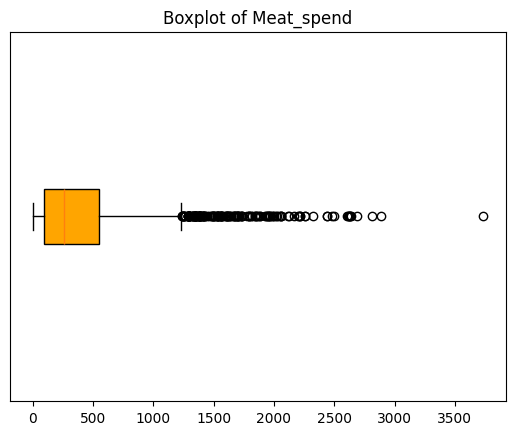

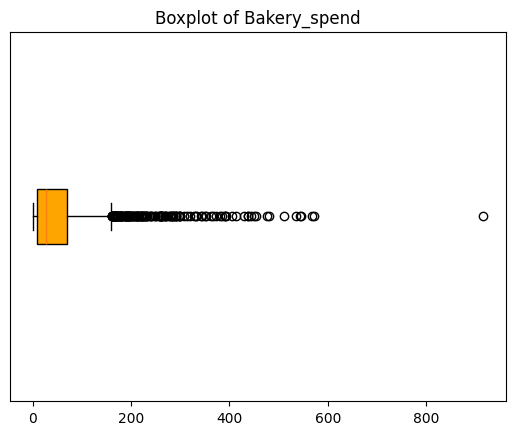

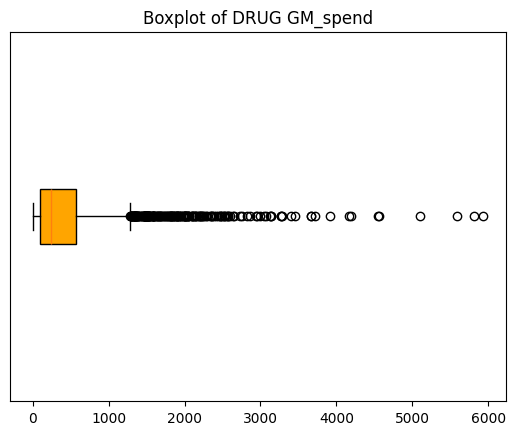

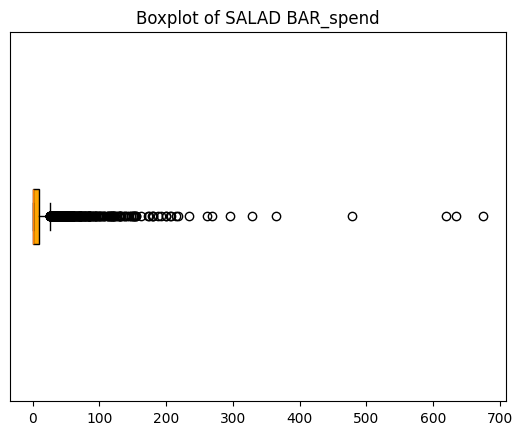

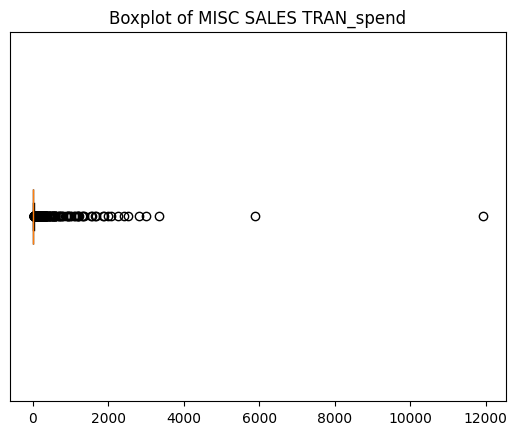

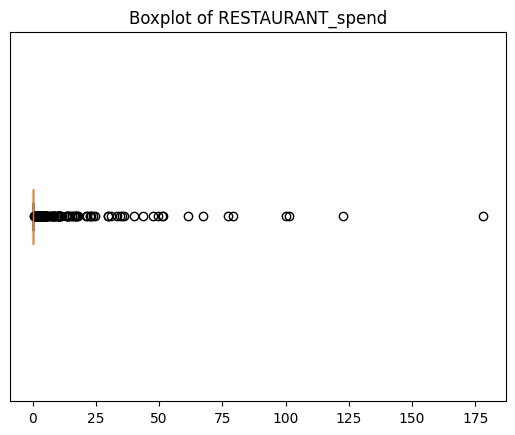

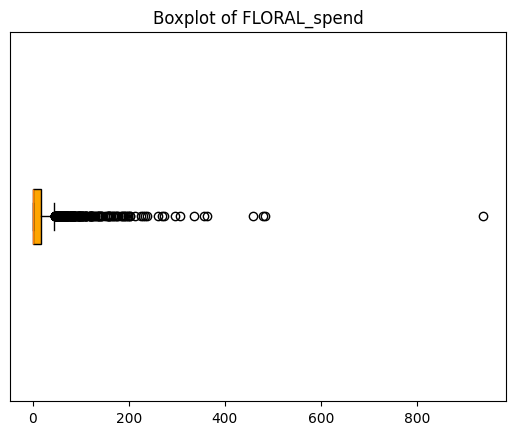

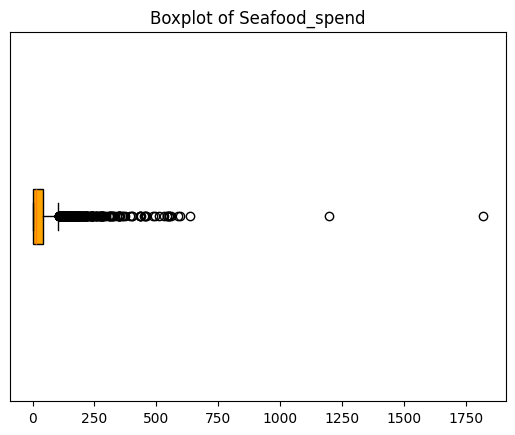

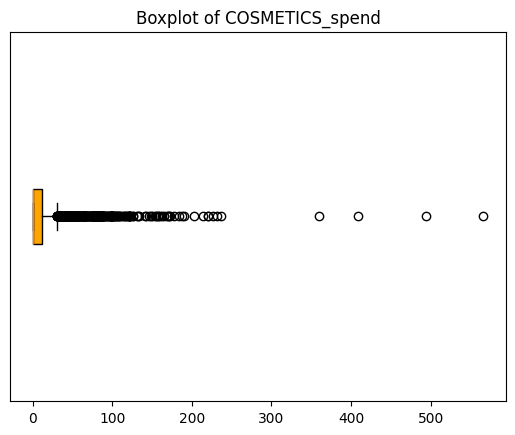

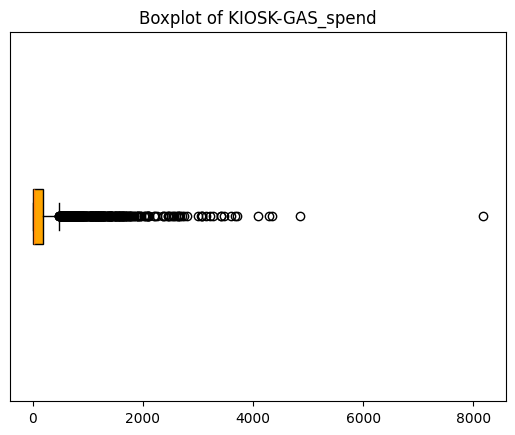

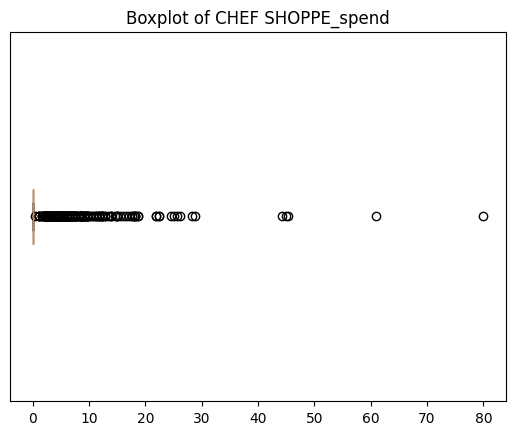

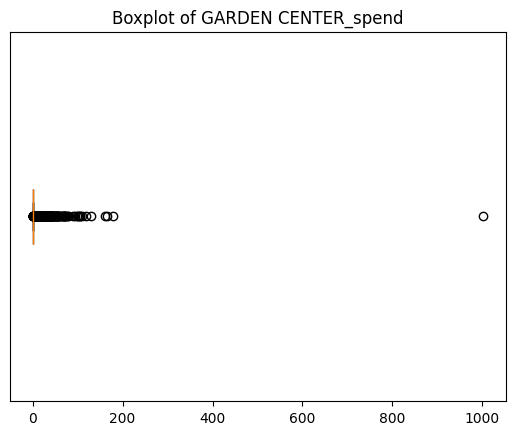

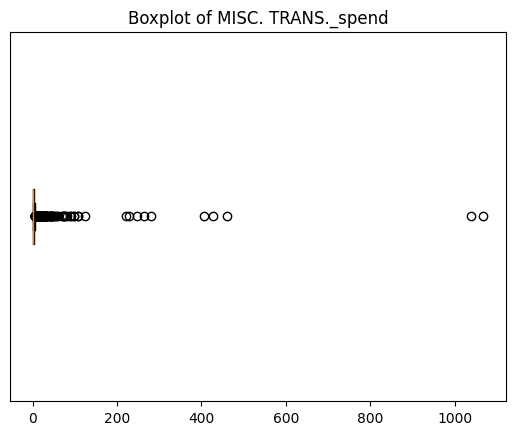

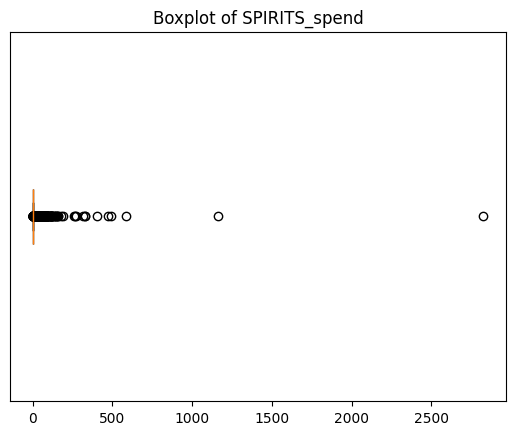

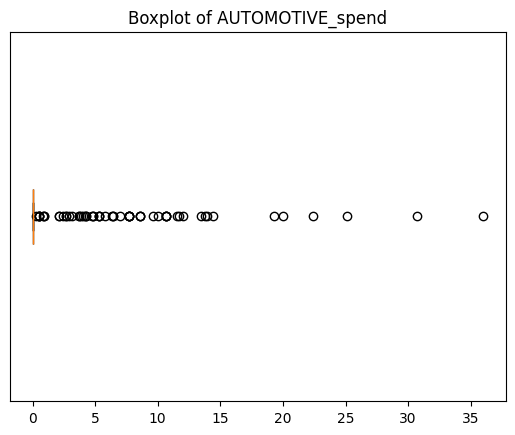

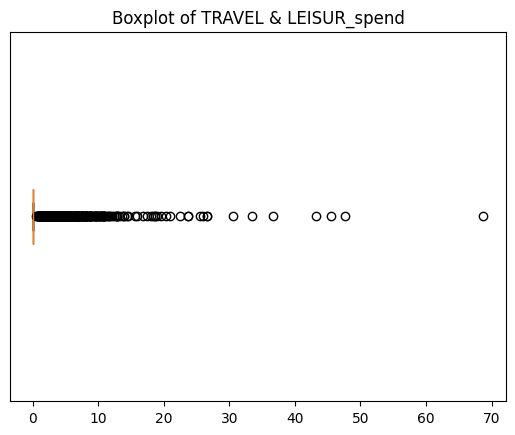

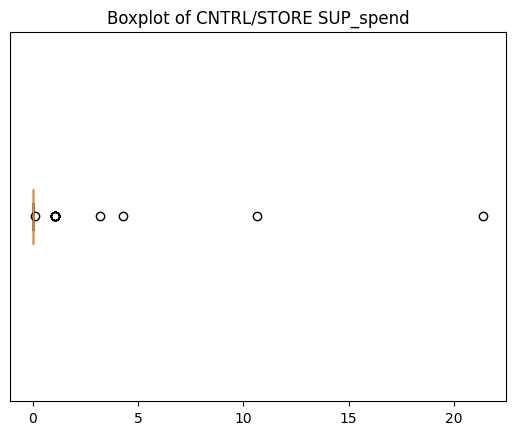

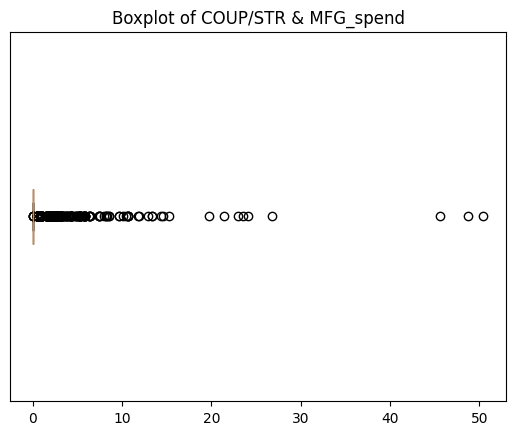

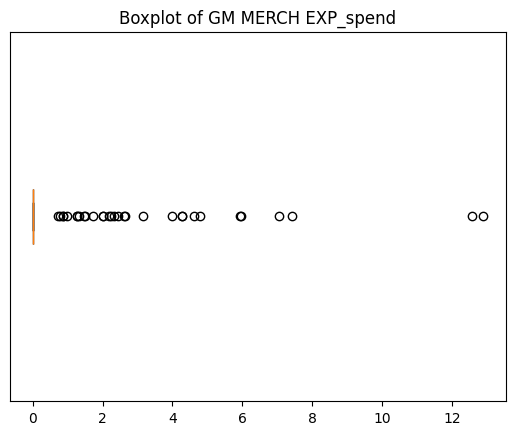

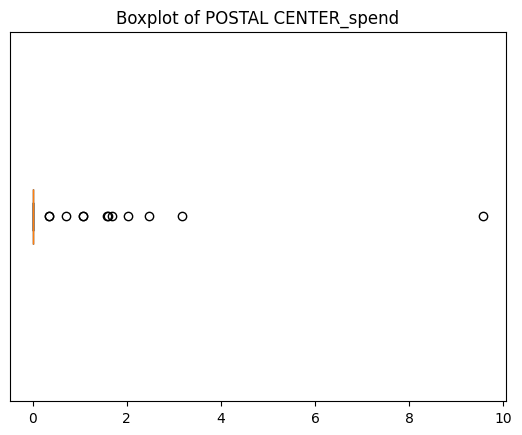

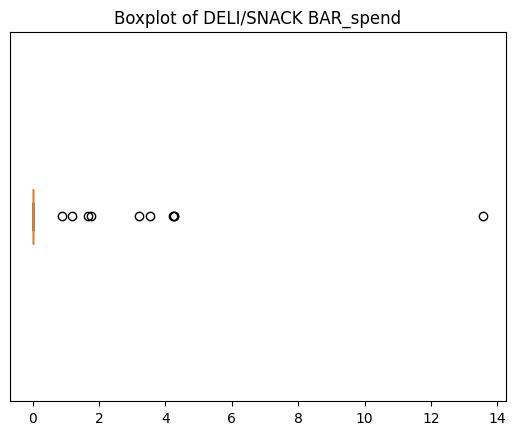

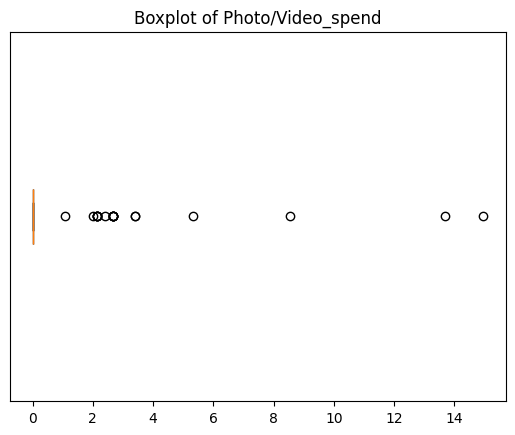

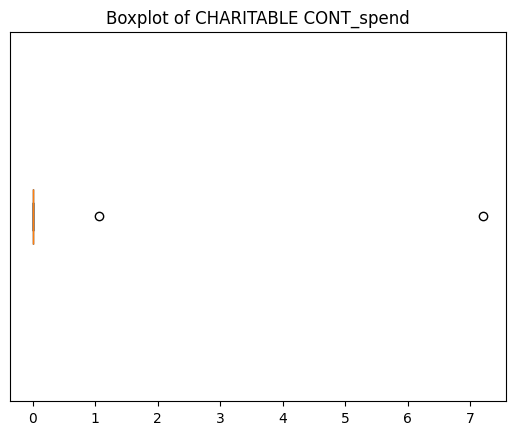

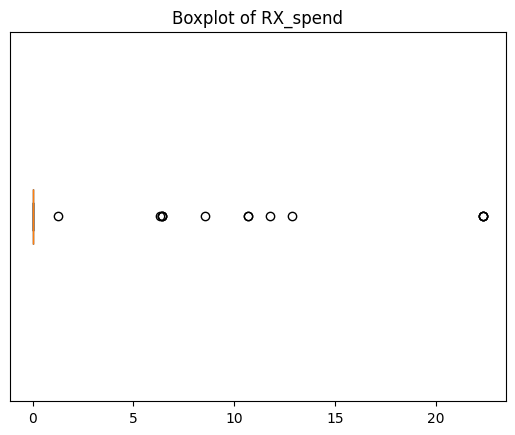

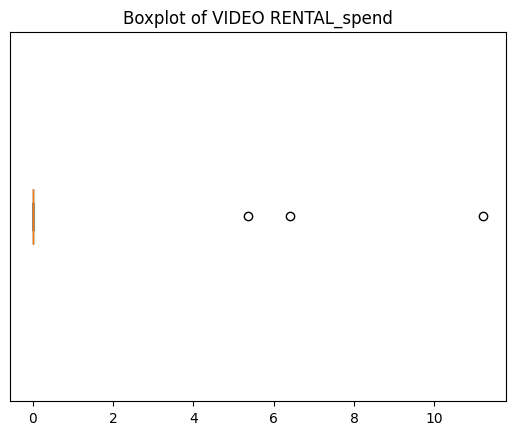

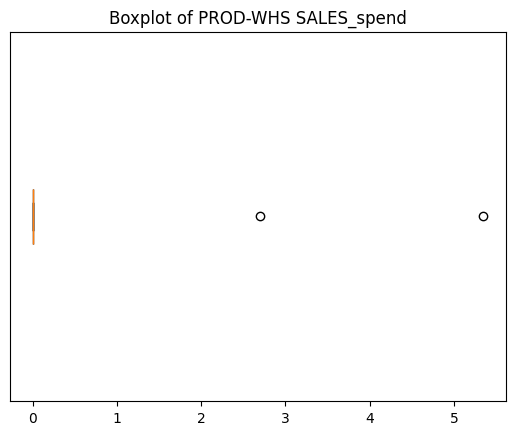

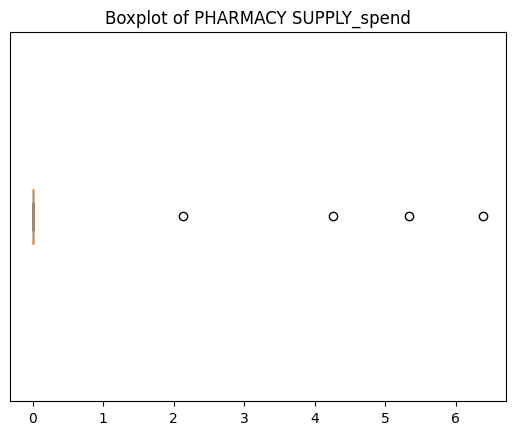

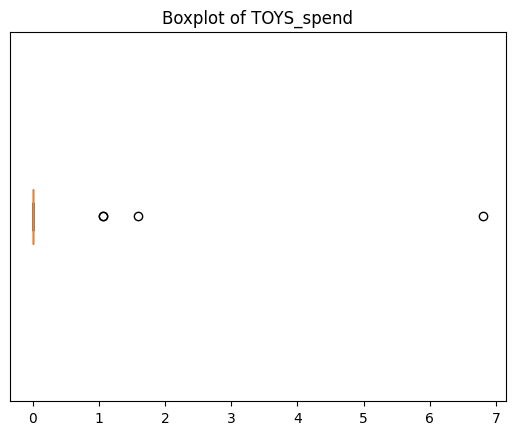

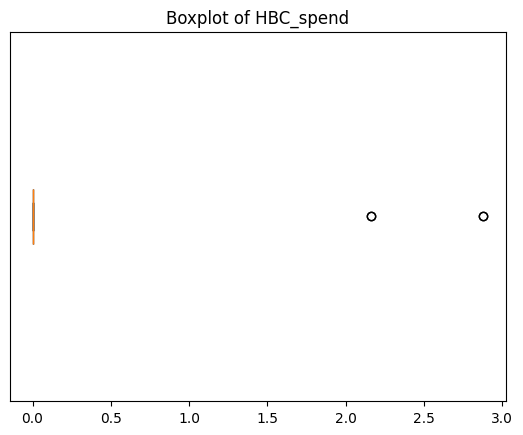

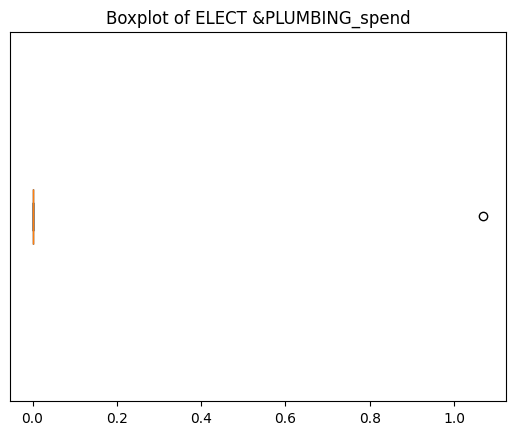

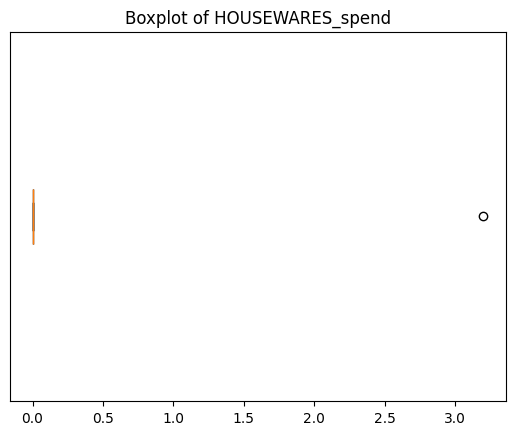

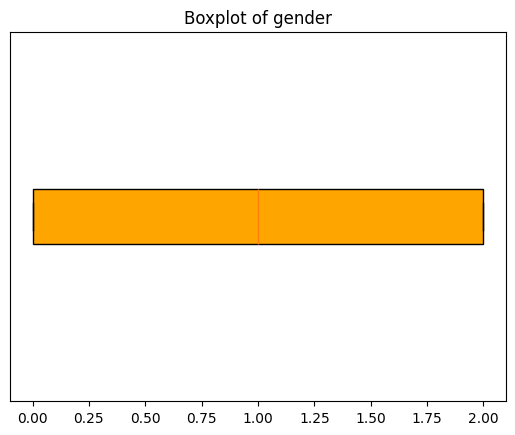

In [9]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'boxplot')

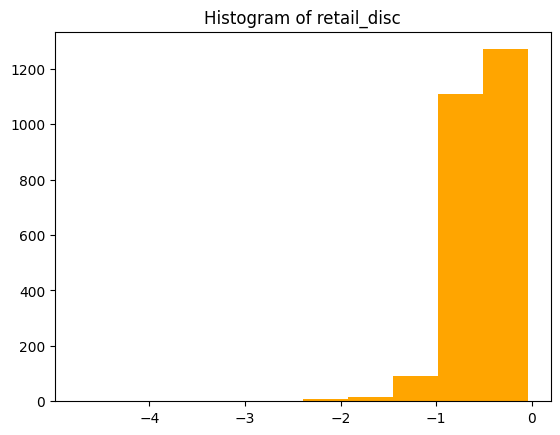

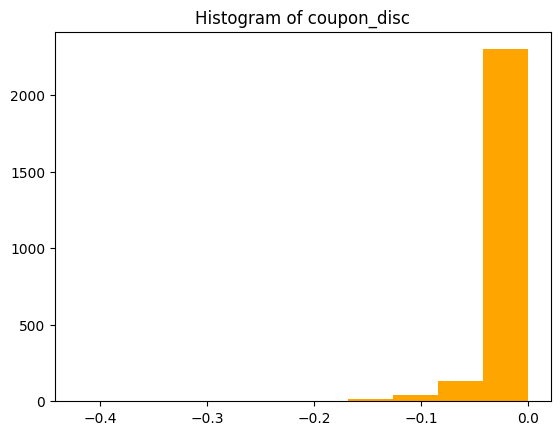

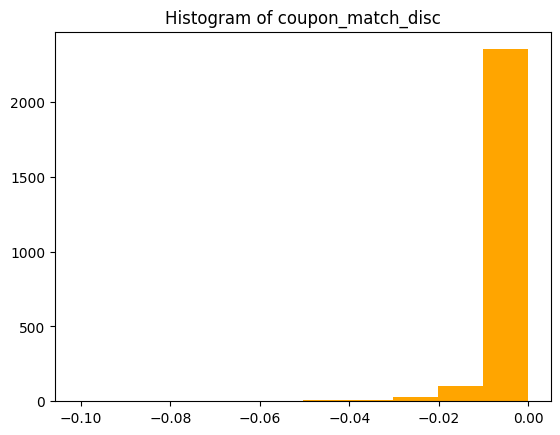

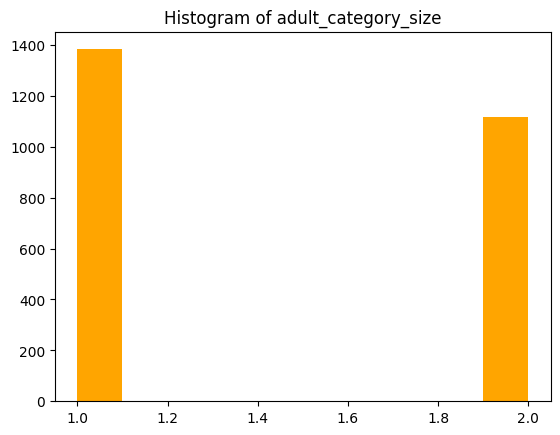

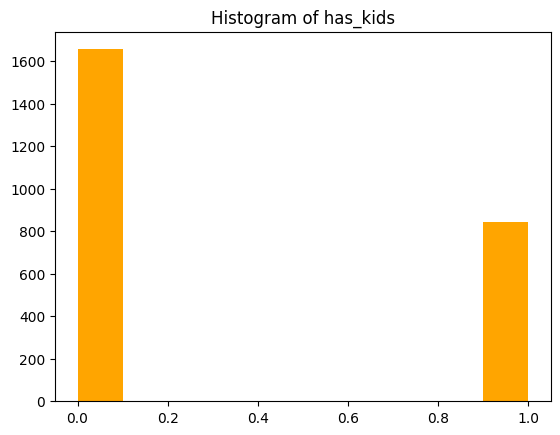

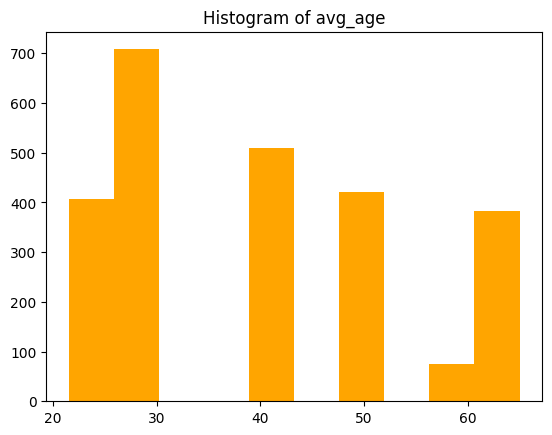

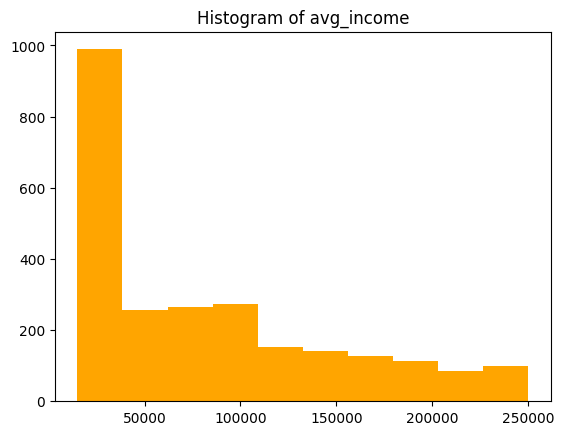

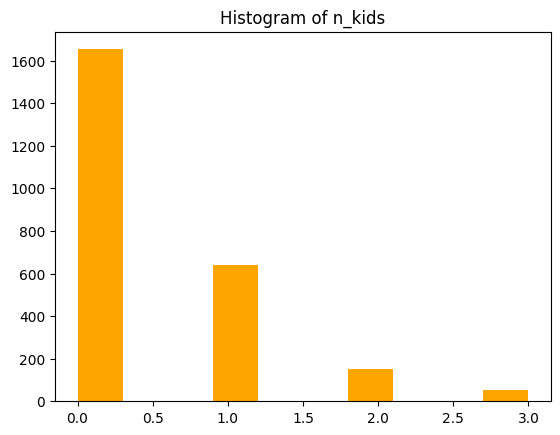

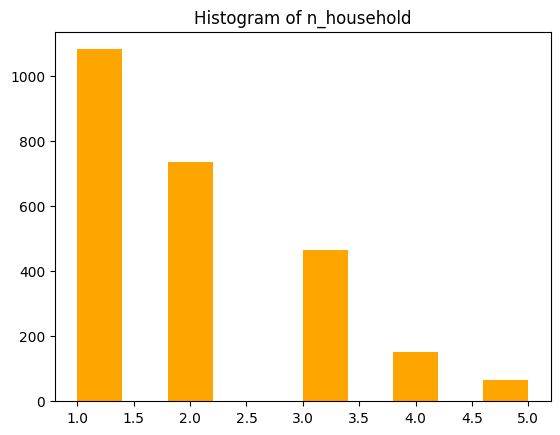

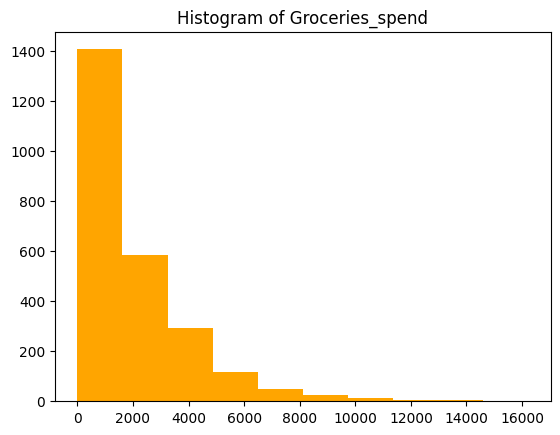

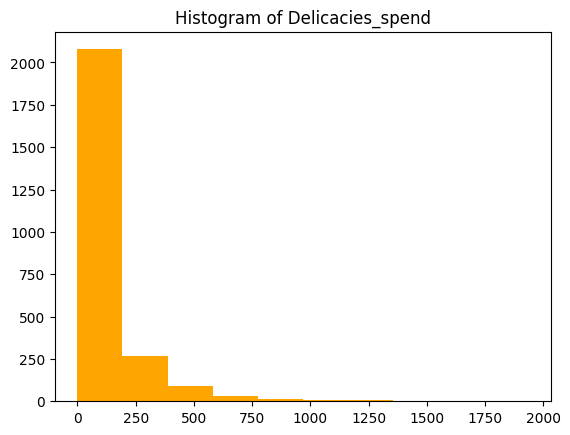

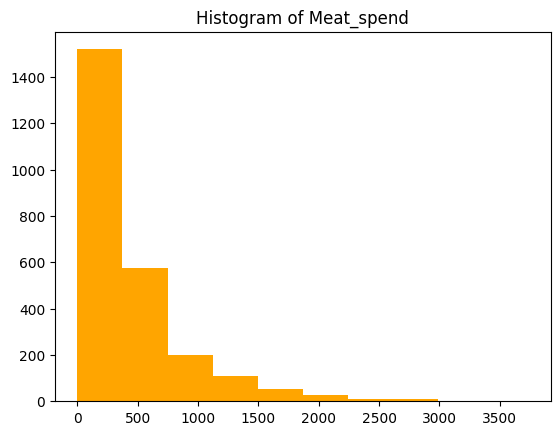

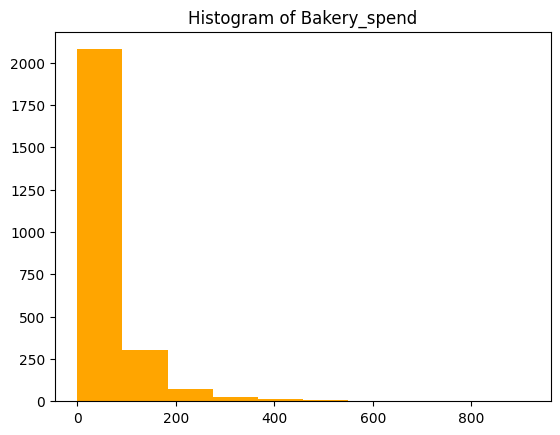

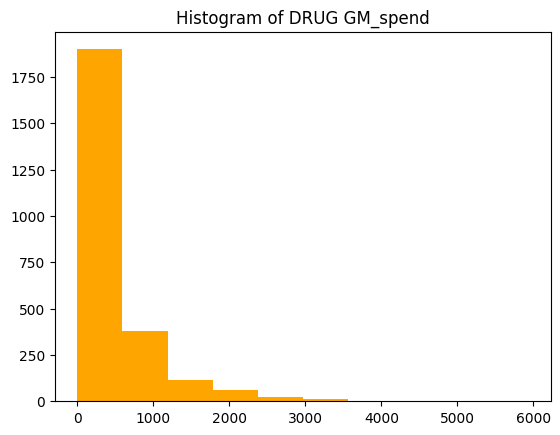

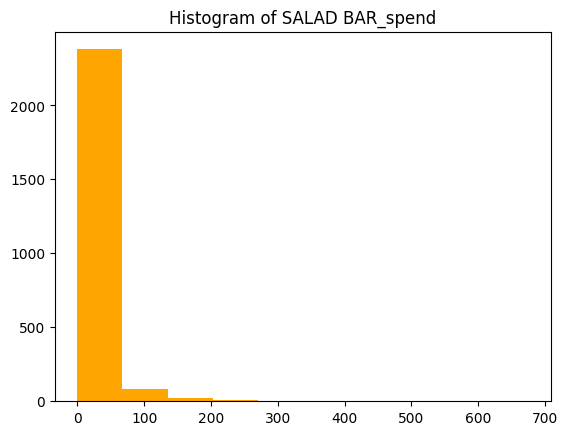

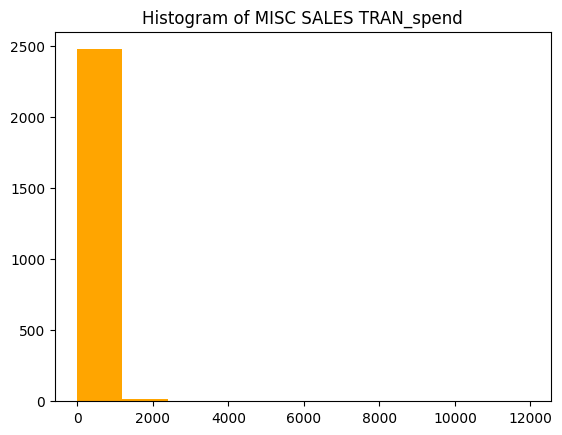

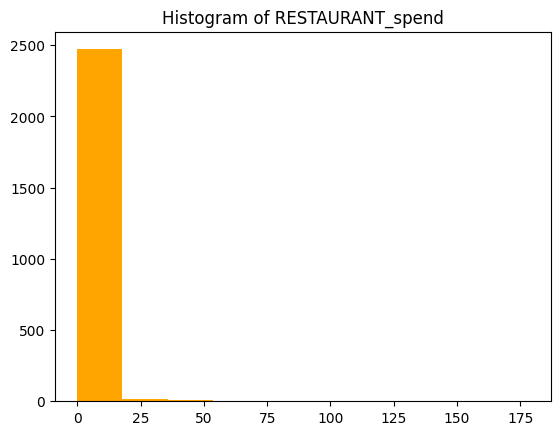

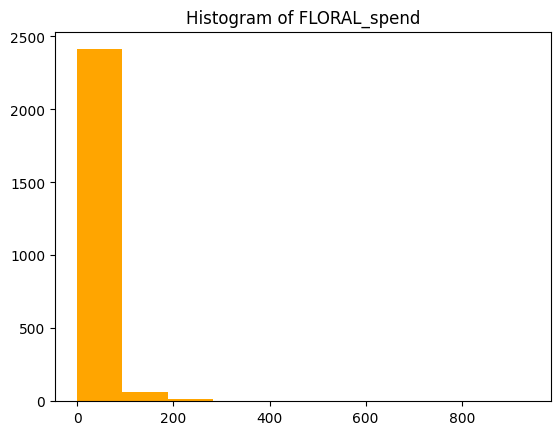

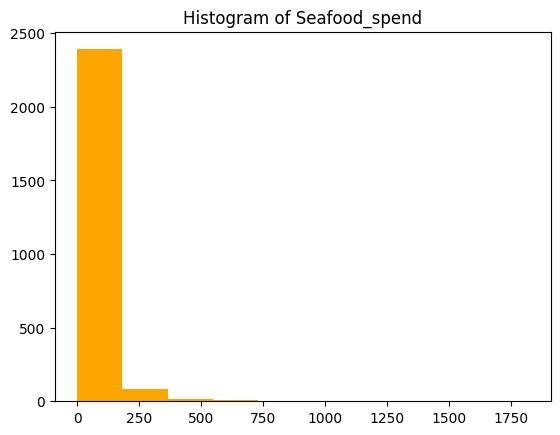

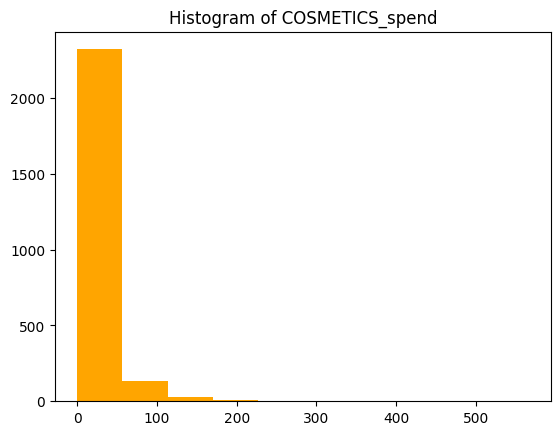

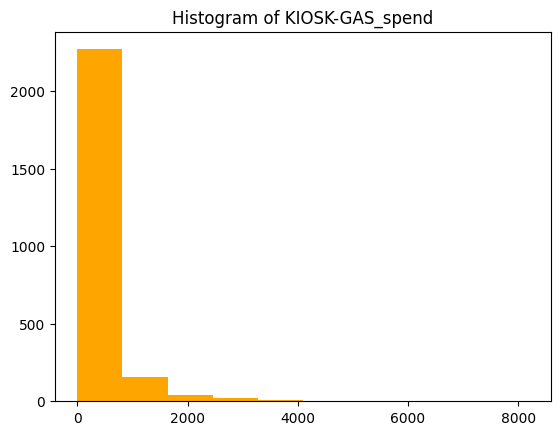

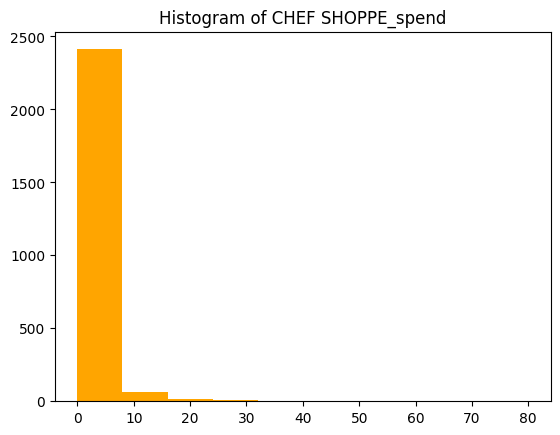

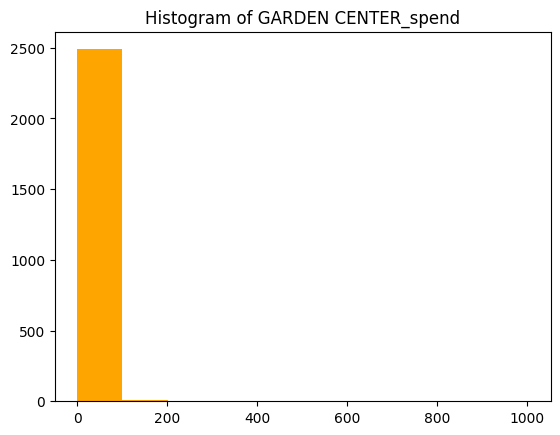

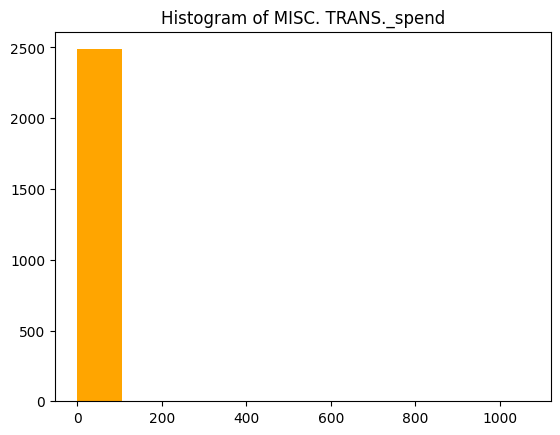

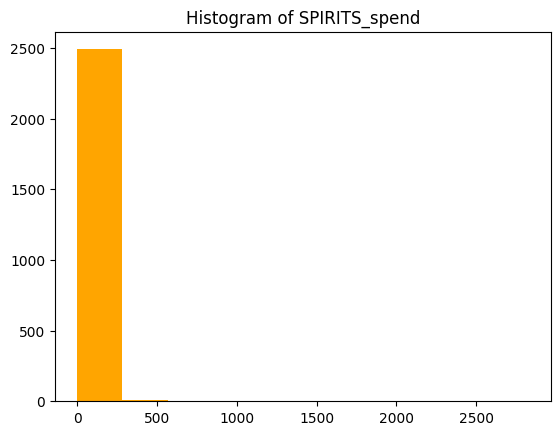

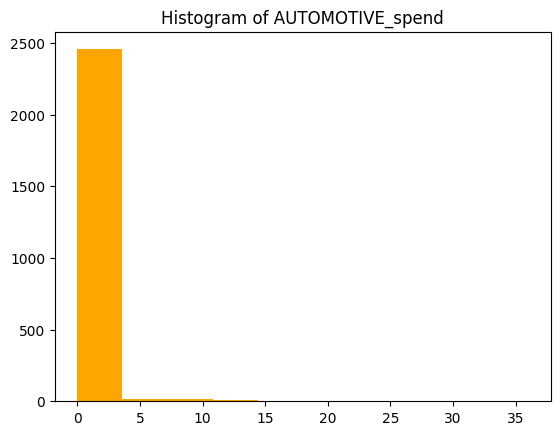

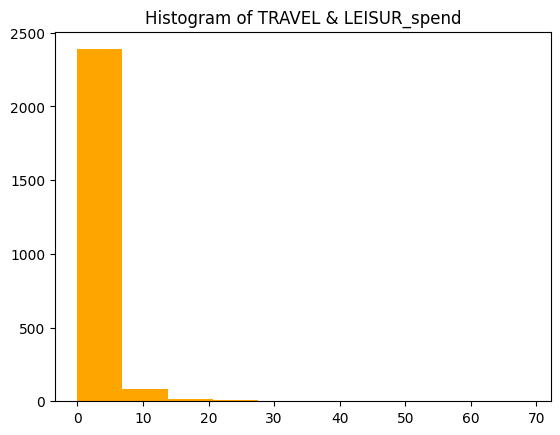

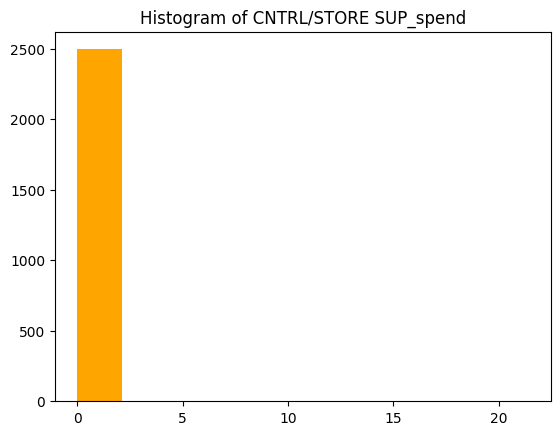

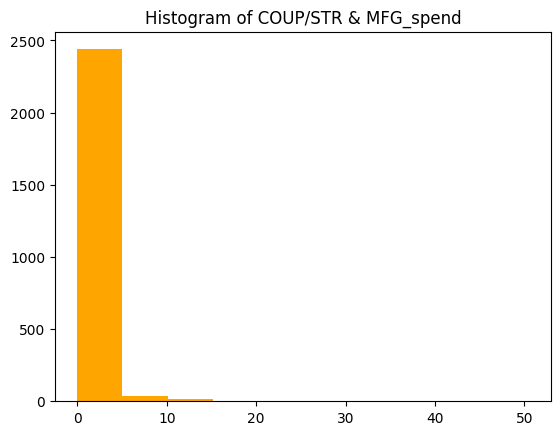

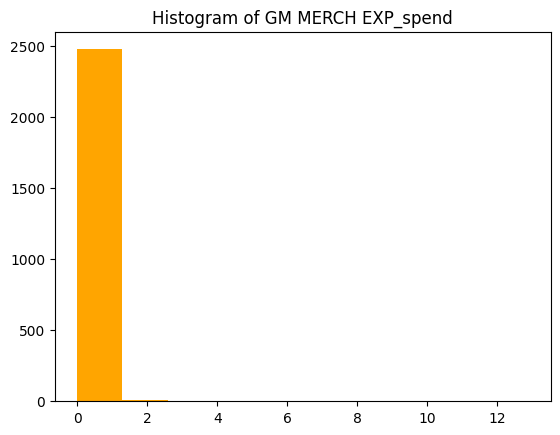

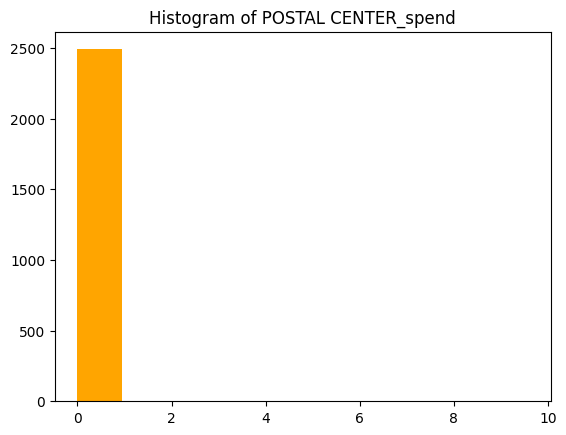

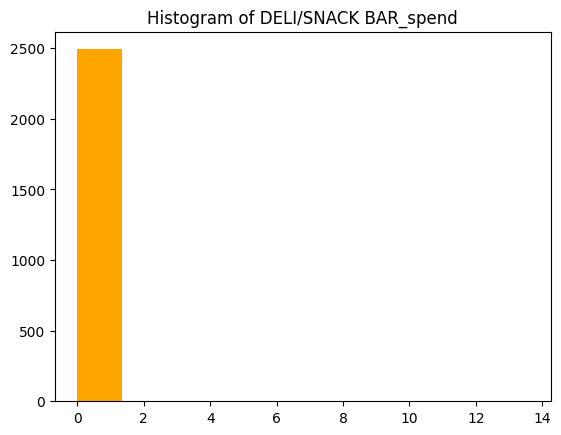

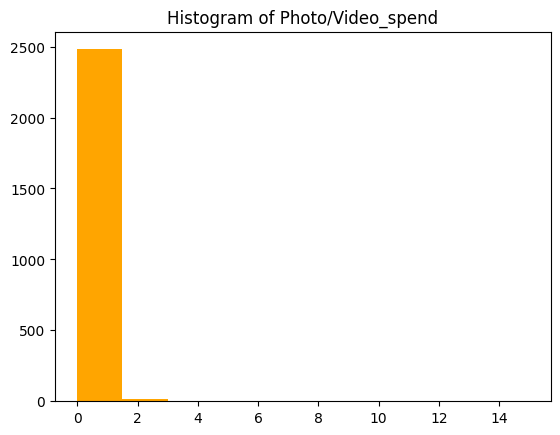

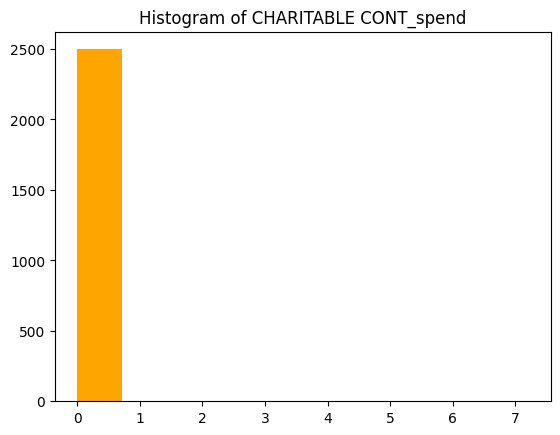

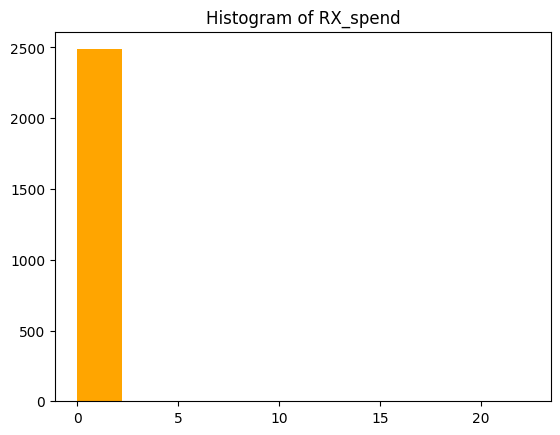

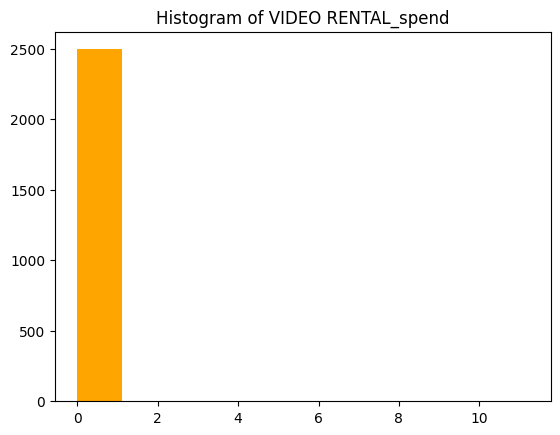

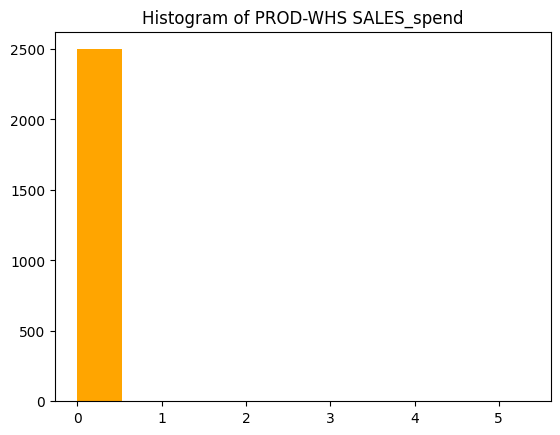

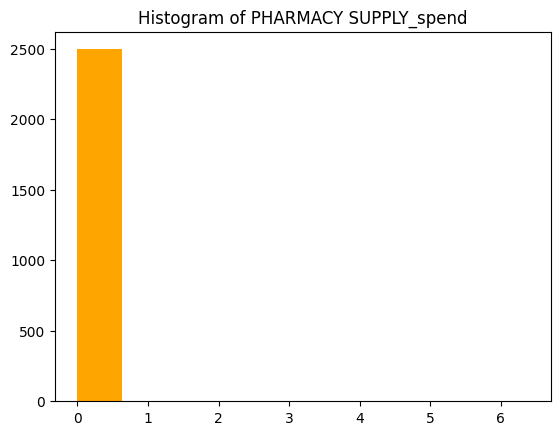

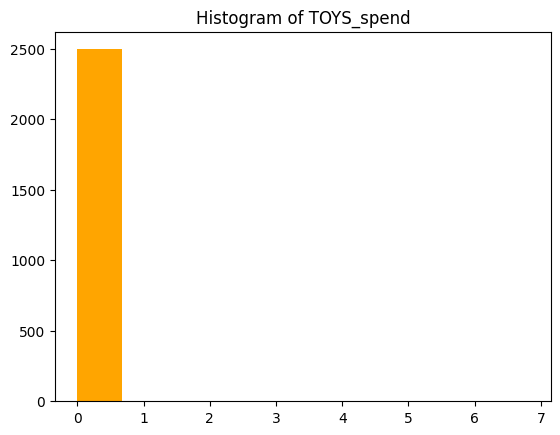

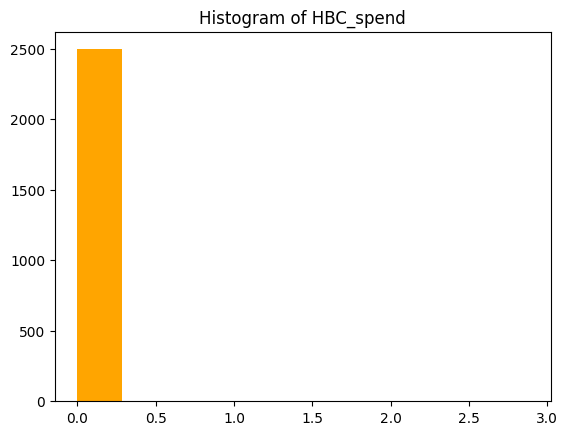

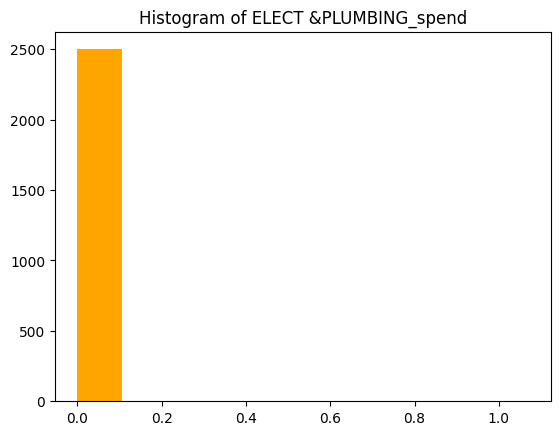

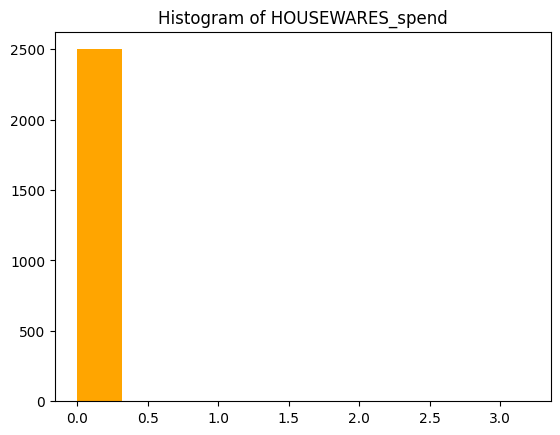

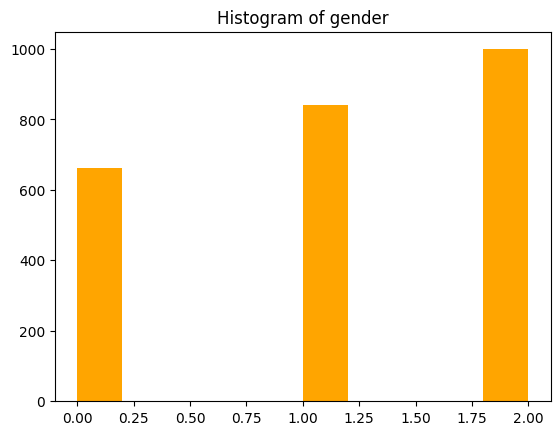

In [10]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'histogram')

## 5. Feature Engineering

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [11]:
customer_info.head(1)

household_key                                           quantity  \
0              1  [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...   

   retail_disc  coupon_disc  coupon_match_disc  \
0     -0.40361     -0.04665           -0.01514   

                                      sales_value_eu  \
0  [4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...   

                                          department first_transaction_date  \
0  [Groceries, Groceries, Groceries, Delicacies, ...             2021-02-20   

  marital_status_code homeowner_desc marital_status age_group  \
0                   A      Homeowner        married    senior   

   adult_category_size  has_kids  avg_age  avg_income  n_kids  n_household  \
0              2.00000   0.00000 65.00000 42000.00000 0.00000      2.00000   

   Groceries_spend  Delicacies_spend  Meat_spend  Bakery_spend  DRUG GM_spend  \
0       3285.02000         226.99000   373.56000     102.01000      568.23000   

   SALAD BAR_spend  MISC SALES TRAN_spend  RESTAURANT_spend  FLORAL_spend  \
0         44.09000               21.40000           4.47000       8.55000   

   Seafood_spend  COSMETICS_spend  KIOSK-GAS_spend  CHEF SHOPPE_spend  \
0        0.00000          0.00000          0.00000            0.00000   

   GARDEN CENTER_spend  MISC. TRANS._spend  SPIRITS_spend  AUTOMOTIVE_spend  \
0              0.00000             0.00000        0.00000           0.00000   

   TRAVEL & LEISUR_spend  CNTRL/STORE SUP_spend  COUP/STR & MFG_spend  \
0                0.00000                0.00000               0.00000   

   GM MERCH EXP_spend  POSTAL CENTER_spend  DELI/SNACK BAR_spend  \
0             0.00000              0.00000               0.00000   

   Photo/Video_spend  CHARITABLE CONT_spend  RX_spend  VIDEO RENTAL_spend  \
0            0.00000                0.00000   0.00000             0.00000   

   PROD-WHS SALES_spend  PHARMACY SUPPLY_spend  TOYS_spend  HBC_spend  \
0               0.00000                0.00000     0.00000    0.00000   

   ELECT &PLUMBING_spend  HOUSEWARES_spend  gender  
0                0.00000           0.00000 2.00000

Marital Status

In [12]:
replacement_mapping = {
    'A': 0, # married
    'B': 1, # single
    'U': 2 # unknown
}

customer_info['marital_status_code'] = customer_info['marital_status_code'].replace(replacement_mapping)


Replace Homeownere Status by a Code

In [13]:
replacement_mapping = {
    'Owner': 0,
    'Homeowner': 0,
    'Probable Owner': 1,
    'Renter': 2,
    'Probable Renters':3,
    'Probable Renter': 3,
    'Unknown': 4,
}

customer_info['homeowner_code'] = customer_info['homeowner_desc'].replace(replacement_mapping)


Compute total_quantity per Household

In [14]:
customer_info['total_quantity'] = customer_info['quantity'].apply(lambda x: sum(x))

Compute Total Sales Value per Household

In [15]:
customer_info['total_sales_value'] = customer_info['sales_value_eu'].apply(lambda x: round(sum(x), 2))

Create a Unique Departments List

In [16]:
customer_info['unique_dep'] = customer_info['department'].apply(functions.unique_words)

Create a Count of Unique Departments Purchased per Household

In [17]:
customer_info['unique_dep_count'] = customer_info['department'].apply(functions.count_unique_departments)

Dropping Temporary Variables

In [18]:
customer_info = customer_info.drop(['quantity', 'sales_value_eu', 'department', 'unique_dep'], axis = 1)

## 6. Correlation Analysis

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

Selecting Numeric Columns

In [19]:
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date', 'homeowner_code'])]

Ensuring all selected columns are numeric

In [20]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   household_key          2500 non-null   int64  
 1   retail_disc            2500 non-null   float64
 2   coupon_disc            2500 non-null   float64
 3   coupon_match_disc      2500 non-null   float64
 4   marital_status_code    2500 non-null   int64  
 5   adult_category_size    2500 non-null   float64
 6   has_kids               2500 non-null   float64
 7   avg_age                2500 non-null   float64
 8   avg_income             2500 non-null   float64
 9   n_kids                 2500 non-null   float64
 10  n_household            2500 non-null   float64
 11  Groceries_spend        2500 non-null   float64
 12  Delicacies_spend       2500 non-null   float64
 13  Meat_spend             2500 non-null   float64
 14  Bakery_spend           2500 non-null   float64
 15  DRUG

In [21]:
cor_spearman = info_numeric.corr(method='spearman')

mask = np.triu(np.ones_like(cor_spearman, dtype=bool))

# Apply the mask to the correlation matrix
cor_spearman_masked = cor_spearman.copy()
cor_spearman_masked[mask] = np.nan

# Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=cor_spearman_masked,
    x=cor_spearman.columns,
    y=cor_spearman.columns,
    colorscale='Blues',
    colorbar=dict(title='Spearman Correlation'),
    zmin=-1, zmax=1,
    hoverongaps=False
))

fig.update_layout(
    title='Spearman Correlation Heatmap (Below Diagonal)',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=90,  tickfont=dict(size=10)),
    yaxis=dict(tickangle=0,  tickfont=dict(size=10)),
    width=1300,
    height=1300,
)

# Show the interactive plot
fig.show()


## 7. Export

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [22]:
customer_info.to_csv(f'{path}/Clustering/customer_info_treated.csv', index=False)